In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Tue Nov 17 05:15:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 00000000:00:1E.0 Off |                    0 |
| N/A   44C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
metadata=pd.read_csv("metadata.csv")

In [3]:
metadata.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [4]:
metadata.groupby(['patientid','survival']).size().to_csv('metadata_counts.csv')

In [5]:
metadata[metadata['survival']=='N']['patientid'].unique()

array(['3', '10', '44', '58', '101', '160', '178', '185', '187', '195',
       '244', '246', '286', '288', '304', '320', '326a', '326b', '331b',
       '340', '357', '398', '403', '427a', '427b', '436'], dtype=object)

In [6]:
metadata[metadata['patientid']=='436'][['patientid','offset','sex','age','survival', 'modality','date','location','folder','filename', 'doi']]

,patientid,offset,sex,age,survival,modality,date,location,folder,filename,doi
852,436,0.0,M,NaN,N,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,cfcdf8d9.jpg,10.6084/m9.figshare.12275009
853,436,1.0,M,NaN,N,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,24de8686.jpg,10.6084/m9.figshare.12275009
854,436,1.0,M,NaN,N,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,a228e110.jpg,10.6084/m9.figshare.12275009
855,436,1.0,M,NaN,N,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,d2c83bde.jpg,10.6084/m9.figshare.12275009
856,436,2.0,M,NaN,N,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,78af4c1d.jpg,10.6084/m9.figshare.12275009
857,436,2.0,M,NaN,N,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,85540916.jpg,10.6084/m9.figshare.12275009
858,436,2.0,M,NaN,N,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,a8685b98.jpg,10.6084/m9.figshare.12275009
859,436,3.0,M,NaN,N,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,09258248.jpg,10.6084/m9.figshare.12275009
860,436,3.0,M,NaN,N,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,1e33b16c.jpg,10.6084/m9.figshare.12275009
861,436,4.0,M,NaN,N,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,430f21e7.jpg,10.6084/m9.figshare.12275009


In [7]:
import numpy as np
patids_alive = np.unique(metadata[metadata['survival']=="Y"]['patientid'])
patids_dead = np.unique(metadata[metadata['survival']=="N"]['patientid'])

In [8]:
np.intersect1d(patids_alive,patids_dead)

array([], dtype=object)

In [9]:
print("There are {} patients alive and {} patients that are dead".format(len(patids_alive), len(patids_dead)))

There are 109 patients alive and 26 patients that are dead


In [10]:
#We will choose 63 alive patients and 12 dead patients as train, 
#24 alive patients and 6 dead patients as dev, 
#and 22 alive patients and 8 dead patients as test
valid_ids_alive=np.random.choice(patids_alive, 24, replace = False)
remaining_ids = np.setdiff1d(patids_alive, valid_ids_alive)
test_ids_alive=np.random.choice(remaining_ids, 22, replace = False)
train_ids_alive=np.setdiff1d(remaining_ids, test_ids_alive)

valid_ids_dead=np.random.choice(patids_dead, 6, replace = False)
remaining_ids = np.setdiff1d(patids_dead, valid_ids_dead)
test_ids_dead=np.random.choice(remaining_ids, 8, replace = False)
train_ids_dead=np.setdiff1d(remaining_ids, test_ids_dead)


In [11]:
print("There are {} patients alive in training dataset and {} patients dead in training dataset".format(len(train_ids_alive), len(train_ids_dead)))
print("There are {} patients alive in validation dataset and {} patients dead in validation dataset".format(len(valid_ids_alive), len(valid_ids_dead)))
print("There are {} patients alive in testing dataset and {} patients dead in testing dataset".format(len(test_ids_alive), len(test_ids_dead)))


There are 63 patients alive in training dataset and 12 patients dead in training dataset
There are 24 patients alive in validation dataset and 6 patients dead in validation dataset
There are 22 patients alive in testing dataset and 8 patients dead in testing dataset


In [12]:
train_ids=np.concatenate((train_ids_alive, train_ids_dead), axis=None)
valid_ids=np.concatenate((valid_ids_alive, valid_ids_dead), axis=None)
test_ids=np.concatenate((test_ids_alive, test_ids_dead), axis=None)

In [13]:
train_df = metadata[metadata['patientid'].isin(train_ids)]
train_df.shape

(204, 30)

In [14]:
train_df['survival'].value_counts()

Y    177
N     27
Name: survival, dtype: int64

In [15]:
test_df = metadata[metadata['patientid'].isin(test_ids)]
test_df.shape

(95, 30)

In [16]:
test_df['survival'].value_counts()

Y    59
N    36
Name: survival, dtype: int64

In [17]:
valid_df = metadata[metadata['patientid'].isin(valid_ids)]
valid_df.shape

(62, 30)

In [18]:
valid_df['survival'].value_counts()

Y    49
N    13
Name: survival, dtype: int64

In [19]:
#train_df.to_csv("train_df.csv")
#valid_df.to_csv("valid_df.csv")
#test_df.to_csv("test_df.csv")

In [20]:
train_df2 = train_df.dropna(subset=['offset'])
train_df2 = train_df2.sort_values(by=['patientid','offset'])
train_df2 = train_df2.reset_index(drop=True)
train_df2.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,11,0.0,M,56.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,2020,"Sunnybrook Health Sciences Centre, Toronto, On...",images,1-s2.0-S0140673620303706-fx1_lrg.jpg,10.1016/S0140-6736(20)30370-6,https://www.sciencedirect.com/science/article/...,NaN,A 56-year-old man presented to our Emergency D...,NaN,NaN
1,112,0.0,NaN,NaN,Pneumonia/Viral/COVID-19,Unclear,Y,NaN,NaN,NaN,...,2020,NaN,images,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,NaN,https://www.ams.edu.sg/colleges/radiologists/c...,NaN,Serial chest radiographs of patient who presen...,Credit to College of Radiologists Singapore an...,NaN
2,112,7.0,NaN,NaN,Pneumonia/Viral/COVID-19,Unclear,Y,NaN,NaN,NaN,...,2020,NaN,images,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,NaN,https://www.ams.edu.sg/colleges/radiologists/c...,NaN,performed 7 days later showed interval resolut...,Credit to College of Radiologists Singapore an...,NaN
3,118,3.0,F,71.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,2020,Italy,images,53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg,NaN,https://www.sirm.org/2020/03/28/covid-19-caso-66/,NaN,"Female patient, 71 years old, transferred to t...","Credit to Izzo Andrea, D'Aversa Lucia, Ceremon...",NaN
4,12,7.0,M,42.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,"January 1, 2020","Tongji Medical College, Wuhan, Hubei Province,...",images,nCoV-radiol.2020200269.fig1-day7.jpeg,10.1148/radiol.2020200269,https://pubs.rsna.org/doi/10.1148/radiol.20202...,NaN,"On January 1, 2020, a 42-year-old man was admi...",NaN,NaN


In [21]:
valid_df2 = valid_df.dropna(subset=['offset'])
train_df2 = valid_df2.sort_values(by=['patientid','offset'])
valid_df2 = valid_df2.reset_index(drop=True)
valid_df2.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,7,7.0,F,29.0,Pneumonia/Viral/SARS,NaN,Y,NaN,NaN,NaN,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 29-year-old woman who presented 7 da...,NaN,NaN
1,7,12.0,F,29.0,Pneumonia/Viral/SARS,NaN,Y,NaN,NaN,NaN,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 29-year-old woman who presented 7 da...,NaN,NaN
2,57,12.0,F,67.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,"January 12, 2020","Hospital of Wuhan University, Wuhan, China",images,all14238-fig-0001-m-b.jpg,10.1111/all.14238,https://onlinelibrary.wiley.com/doi/full/10.11...,NaN,Chest Xay and CT images of a 67ld woman with o...,NaN,NaN
3,57,22.0,F,67.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,"January 22, 2020","Hospital of Wuhan University, Wuhan, China",images,all14238-fig-0001-m-c.jpg,10.1111/all.14238,https://onlinelibrary.wiley.com/doi/full/10.11...,NaN,Chest Xay and CT images of a 67ld woman with o...,NaN,NaN
4,58,6.0,M,36.0,Pneumonia/Viral/COVID-19,Y,N,Y,N,Y,...,January 12,"Hospital of Wuhan University, Wuhan, China",images,all14238-fig-0002-m-d.jpg,10.1111/all.14238,https://onlinelibrary.wiley.com/doi/full/10.11...,NaN,Chest Xay and CT scan images of a 36ld man wit...,NaN,NaN


In [22]:
test_df2 = test_df.dropna(subset=['offset'])
test_df2 = test_df2.sort_values(by=['patientid','offset'])
test_df2 = test_df2.reset_index(drop=True)
test_df2.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,10,19.0,F,73.0,Pneumonia/Viral/SARS,NaN,N,NaN,NaN,NaN,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 73-year-old woman who presented 17 d...,NaN,NaN
1,10,27.0,F,73.0,Pneumonia/Viral/SARS,NaN,N,NaN,NaN,NaN,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 73-year-old woman who presented 17 d...,NaN,NaN
2,10,35.0,F,73.0,Pneumonia/Viral/SARS,NaN,N,NaN,NaN,NaN,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 73-year-old woman who presented 17 d...,NaN,NaN
3,16,5.0,F,59.0,Pneumonia/Viral/COVID-19,Unclear,Y,NaN,NaN,NaN,...,2020,"Sichuan Provincial People’s Hospital, Chengdu,...",images,ryct.2020200028.fig1a.jpeg,10.1148/ryct.2020200028,https://pubs.rsna.org/doi/full/10.1148/ryct.20...,NaN,A 59-year-old female from Sichuan Provincial P...,NaN,NaN
4,244,6.0,M,NaN,Pneumonia/Viral/COVID-19,Unclear,N,NaN,NaN,Y,...,2020,"Hannover Medical School, Hannover, Germany",images,d6494b39.jpg,10.6084/m9.figshare.12275009,https://github.com/ml-workgroup/covid-19-image...,CC BY 3.0,NaN,NaN,NaN


In [23]:
metadata.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')

In [24]:
!pip install torch==1.7.0+cu101 torchvision==0.8.1+cu101 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [25]:
# pytorch mnist cnn + lstm

from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [26]:
class Args:
    def __init__(self):
        self.cuda = False
        self.no_cuda = False
        self.seed = 1
        self.batch_size = 6
        self.test_batch_size = 6
        self.epochs = 10
        self.lr = 0.01
        self.momentum = 0.5
        self.log_interval = 10

In [27]:
args = Args()

args.cuda = not args.no_cuda and torch.cuda.is_available()

In [28]:
torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)

In [29]:
kwargs = {'num_workers': 1, 'pin_memory': True} if args.cuda else {}

In [30]:
import os
import shutil
import random
import numpy as np
import pandas as pd
import torchvision
from PIL import Image
from matplotlib import pyplot as plt
print('Using PyTorch version', torch.__version__)

Using PyTorch version 1.7.0+cu101


In [31]:
class ChestXRayDataset(torch.utils.data.Dataset):
    def __init__(self, image_dirs, df, transform):
        def get_images(filenames,patient):
            images = [x for x in os.listdir(image_dirs['covid']) if (x in filenames)]
            print(f'Found {len(images)} examples for patient {patient}')
            return images
        self.df = df
        self.images = {}
        self.labels = []
        self.pat_ids = self.df['patientid'].unique().tolist()
        print(self.pat_ids)
        print(len(self.pat_ids))
        for i, patient in enumerate(self.pat_ids):
            print(patient)
            filenames = self.df[self.df['patientid'] == patient]['filename'].tolist()
            print(filenames)
            self.images[i] = get_images(filenames, patient)
            if self.df[self.df['patientid'] == patient]['survival'].iloc[0] == "N":
                self.labels.append(0)
            else:
                self.labels.append(1)
            
        self.image_dirs = image_dirs
        self.transform = transform
        print(self.labels)
        print(len(self.labels))
    
    def __len__(self):
        return len(self.images) # sum([len(self.images[patient]) for patient in self.pat_ids])
    
    
    def __getitem__(self, index):
        xray_series = []
        all_images = self.images[index]
        for image_name in all_images:
            print(image_name)
            image_path = os.path.join(self.image_dirs['covid'],image_name)
            image = Image.open(image_path).convert('RGB')
            image = self.transform(image)
            xray_series.append(image)
    
        img_stack = torch.stack(xray_series)
        return img_stack, self.labels[index]

In [32]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [33]:
train_dirs = { 
    'covid': '/home/ubuntu/datasets/covid-chestxray-dataset'
}
train_dataset = ChestXRayDataset(train_dirs,train_df2, transform)

['178', '185', '206', '219', '222', '233', '249', '263', '281', '291', '319a', '319b', '326b', '332', '333', '350c', '385', '409', '462', '57', '58', '67', '7', '76', '80', '91']
26
178
['16660_1_1.jpg', '16660_2_1.jpg', '16660_3_1.jpg', '16660_4_1.jpg', '16660_5_1.jpg']
Found 5 examples for patient 178
185
['ajr.20.23034.pdf-001.png', 'ajr.20.23034.pdf-003.png']
Found 2 examples for patient 185
206
['16747_1_1.jpg', '16747_2_1.jpg', '16747_3_1.jpg']
Found 3 examples for patient 206
219
['b343e657.jpg', '53c9be49.jpg']
Found 2 examples for patient 219
222
['61bc50d1.jpg', '87d50e40.jpg']
Found 2 examples for patient 222
233
['441c9cdd.jpg']
Found 1 examples for patient 233
249
['c828e894.jpg', '24035bda.jpg', '08d780ae.jpg']
Found 3 examples for patient 249
263
['0a7faa2a.jpg', 'b39f5cf9.jpg', '5782ae15.jpg']
Found 3 examples for patient 263
281
['000001-12.jpg', '000002-14.jpg']
Found 2 examples for patient 281
291
['296_2020_4584_Fig2_HTML-a.png', '296_2020_4584_Fig2_HTML-b.png', '29

In [34]:
len(train_dataset.__getitem__(1)[0])

ajr.20.23034.pdf-003.png
ajr.20.23034.pdf-001.png


2

In [35]:
train_df2[train_df2['patientid']=='17']

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29


In [36]:
dev_dirs = {
    'covid': '/home/ubuntu/datasets/covid-chestxray-dataset'
}
dev_dataset = ChestXRayDataset(dev_dirs, valid_df2, transform)

['7', '57', '58', '67', '76', '80', '91', '178', '185', '206', '219', '222', '233', '249', '263', '281', '291', '319a', '319b', '326b', '332', '333', '350c', '385', '409', '462']
26
7
['SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg', 'SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg']
Found 2 examples for patient 7
57
['all14238-fig-0001-m-b.jpg', 'all14238-fig-0001-m-c.jpg']
Found 2 examples for patient 57
58
['all14238-fig-0002-m-d.jpg', 'all14238-fig-0002-m-e.jpg', 'all14238-fig-0002-m-f.jpg']
Found 3 examples for patient 58
67
['1-s2.0-S1684118220300682-main.pdf-002-a1.png', '1-s2.0-S1684118220300682-main.pdf-002-a2.png']
Found 2 examples for patient 67
76
['kjr-21-e25-g001-l-a.jpg']
Found 1 examples for patient 76
80
['figure1-5e75d0940b71e1b702629659-98-right.jpeg']
Found 1 examples for patient 80
91
['aspiration-pneumonia-5-day0.jpg', 'aspiration-pneumonia-5-day3.jpg', 'aspiration-pneumonia-5-day10.jpg', 'aspiration-pneumonia-5-day27.jpg']
Found 4 examples for patien

In [37]:
test_dirs = {
    'covid': '/home/ubuntu/datasets/covid-chestxray-dataset'
}

test_dataset = ChestXRayDataset(test_dirs, test_df2, transform)

['10', '16', '244', '254', '272', '273', '277', '283', '284', '312', '315', '329', '331b', '348', '389', '394', '403', '430', '434', '436', '444', '71', '87', '92', '94']
25
10
['SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg', 'SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg', 'SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg']
Found 3 examples for patient 10
16
['ryct.2020200028.fig1a.jpeg']
Found 1 examples for patient 16
244
['d6494b39.jpg', 'd680397c.jpg']
Found 2 examples for patient 244
254
['1f8a4a54.jpg', '21982772.jpg']
Found 2 examples for patient 254
272
['16583_1_1.jpg', '16583_3_1.jpg']
Found 2 examples for patient 272
273
['000001-2.jpg', '000002-2.jpg']
Found 2 examples for patient 273
277
['000002-3.png', '000005-3.png', '000006-2.png', '000007-2.png', '000010-2.png']
Found 5 examples for patient 277
283
['000001-17.jpg', '000002-19-a.jpg', '000002-19-b.jpg']
Found 3 examples for patient 283
284
['000001-19.jpg', '000006-12.jpg', '000010-5.jpg', '0000

In [38]:
from torch.nn.utils.rnn import pad_sequence
batch_size = 6
def pad_collate(batch):
    (xx, yy) = zip(*batch)
    x_lens = [len(x) for x in xx]
    #x_lens = [20]*batch_size
    print("x_lens: ", x_lens)
    
    xx_pad = pad_sequence(xx, batch_first=True, padding_value=0)
    xx_pad = torch.tensor(xx_pad, dtype=torch.float)
    
    print("xx_pad.shape: ", xx_pad.shape)
    
    
    return xx_pad,  yy

dl_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=pad_collate)
dl_dev = torch.utils.data.DataLoader(dev_dataset, batch_size=batch_size, shuffle=True, collate_fn=pad_collate)
dl_test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, collate_fn=pad_collate)

print('Number of training batches', len(dl_train))
print('Number of dev batches', len(dl_dev))
print('Number of test batches', len(dl_test))

Number of training batches 5
Number of dev batches 5
Number of test batches 5


In [38]:
print(len(train_dataset))

26


In [37]:
train_lengths = [len(train_dataset.__getitem__(ind)[0]) for ind in range(0,len(train_dataset))]
dev_lengths = [len(dev_dataset.__getitem__(ind)[0]) for ind in range(0, len(dev_dataset))]
test_lengths = [len(test_dataset.__getitem__(ind)[0]) for ind in range(0,len(test_dataset))]

SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg
SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg
53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg
ryct.2020200028.fig1a.jpeg
82a78c13.jpg
000001-9-b.jpg
000002-11-b.jpg
000001-9-a.jpg
000002-11-a.jpg
SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg
SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg
1-s2.0-S0735675720302746-gr1_lrg.jpg
afaa068f1.png
12941_2020_358_Fig1_HTML.jpg
000007-15.jpg
000001-24.jpg
000006-17.jpg
08ed451c576ee00935ee178ec85c57_jumbo-1.jpeg
e73d6e89fcd781b8afd159cf533358_jumbo-1.jpeg
5359825d.jpg
0cd9fcb6.jpg
b0500187.jpg
ce09cfab.jpg
76093afc.jpg
000003.jpg
000005.jpg
000004.jpg
000001-7.jpg
000004.png
1d40779e.jpg
0cea09eb.jpg
75fb7cd80d5ca4074c474f93471ad4_jumbo.jpeg
01ec02c48ce0120d57456b2ee2d02f_jumbo.jpeg
1-s2.0-S1684118220300682-main.pdf-003-b1.png
1-s2.0-S1684118220300682-main.pdf-003-b2.png
gr1_lrg-

In [43]:
maxlen = max(train_lengths+dev_lengths+test_lengths)
maxlen

5

In [39]:
args.cuda

True

In [445]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        print("x.shape: ", x.shape)
        x = x.view(-1, 20*53*53)
        #x = F.relu(self.fc1(x))
        #x = F.dropout(x, training=self.training)
        #x = self.fc2(x)
        #return F.log_softmax(x, dim=1)
        return x


class Combine(nn.Module):
    def __init__(self):
        super(Combine, self).__init__()
        self.cnn = CNN()
        self.rnn = nn.LSTM(
            input_size=20*53*53, 
            hidden_size=64, 
            num_layers=1,
            batch_first=True)
        self.linear = nn.Linear(64,2)
        # Build our classifier 

    def forward(self, x):
        print("x.size(): ", x.size())
        batch_size, timesteps, C, H, W = x.size()
        c_in = x.view(batch_size * timesteps, C, H, W)
        c_out = self.cnn(c_in)
        r_in = c_out.view(batch_size, timesteps, -1)
        r_out, (h_n, h_c) = self.rnn(r_in)
        r_out2 = self.linear(r_out[:, -1, :])
        
        return F.softmax(r_out2, dim=1)


model = Combine()
#if args.cuda:
#    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(dl_train):
        print("batch_idx: ", batch_idx, "target: ", target, "data.shape: ", data.shape)
        #data = np.expand_dims(data, axis=1)
        data = torch.FloatTensor(data)
        #if args.cuda:
         #   data, target = data.cuda(), target.cuda()
            

        
        #data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        print("output: ", output)
        print("output.shape: ", output.shape)
        target = torch.FloatTensor(target)
        print(target.shape)
        target = target.reshape(target.shape[0], 1)
        print("target: ", target)
        print("target.shape: ", target.shape)
        output = Variable(output, requires_grad=True)
        target = Variable(target, requires_grad=True)
        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(output, torch.max(target,1)[1])
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(dl_train.dataset),
                100. * batch_idx / len(dl_train), loss.item()))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in dl_dev:
        
        #data = np.expand_dims(data, axis=1)
        data = torch.FloatTensor(data)
        #print(target.size)
        
       # if args.cuda:
        #    data, target = data.cuda(), target.cuda()
        #data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        target = torch.FloatTensor(target)
        print(target.shape)
        target = target.reshape(target.shape[0], 1)
        loss_fn = nn.CrossEntropyLoss()
        target_ = torch.max(target,1)[1]
        test_loss += loss_fn(output, target_ )  # sum up batch loss
        pred = torch.max(output, 1)[1] #output.data.max(1, keepdim=True)[1]  # get the index of the max log-probability
        correct += torch.sum(pred == target.data.view_as(pred)) #pred.eq(target.data.view_as(pred)).long().cpu().sum()
        print("pred: ", pred, "target: ", target)
    test_loss /= len(dl_dev.dataset)
    print(
        '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(dl_dev.dataset),
            100. * correct / len(dl_dev.dataset)))


for epoch in range(1, args.epochs + 1):
    train(epoch)
    test()

16747_3_1.jpg
16747_2_1.jpg
16747_1_1.jpg
85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg
bd3ceeb6.jpg
a4318ac9.jpg
2168a917.jpg
covid-19-caso-99-1-19.png
all14238-fig-0001-m-b.jpg
all14238-fig-0001-m-c.jpg
296_2020_4584_Fig2_HTML-b.png
296_2020_4584_Fig2_HTML-c.png
296_2020_4584_Fig2_HTML-a.png
x_lens:  [3, 1, 3, 1, 2, 3]
xx_pad.shape:  torch.Size([6, 3, 3, 224, 224])
batch_idx:  0 target:  (1, 0, 1, 1, 1, 1) data.shape:  torch.Size([6, 3, 3, 224, 224])
x.size():  torch.Size([6, 3, 3, 224, 224])


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


x.shape:  torch.Size([18, 20, 53, 53])
output:  tensor([[0.4546, 0.5454],
        [0.3979, 0.6021],
        [0.4180, 0.5820],
        [0.4366, 0.5634],
        [0.4155, 0.5845],
        [0.4872, 0.5128]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
Train Epoch: 1 [0/75 (0%)]	Loss: 0.760711
c4a0e11a.jpg
d2af569b.jpg
33ad0dcb.jpg
26e8db49.jpg
2ecd360d.jpg
16745_2_1.PNG
16745_2_2.PNG
16745_2_3.PNG
1-s2.0-S2213716520301168-gr1_lrg-c.png
1-s2.0-S2213716520301168-gr1_lrg-b.png
1-s2.0-S2213716520301168-gr1_lrg-a.png
000004.png
84da526d0453b9b9e7896631e6b366_jumbo.jpeg
defc5c87e473bdaf4f57e4c4c22e3b_jumbo.jpeg
gr1_lrg-a.jpg
gr1_lrg-b.jpg
x_lens:  [5, 3, 3, 1, 2, 2]
xx_pad.shape:  torch.Size([6, 5, 3, 224, 224])
batch_idx:  1 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 5, 3, 224, 224])
x.size():  torch.Size([6, 5, 3, 224, 22

8b7aeaa2063bf9a12ed6b79c173f4e_jumbo.jpeg
tpmd200203f2-a.png
tpmd200203f2-b.png
tpmd200203f2-c.png
x_lens:  [1, 3, 8, 1, 1, 3]
xx_pad.shape:  torch.Size([6, 8, 3, 224, 224])
batch_idx:  9 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 8, 3, 224, 224])
x.size():  torch.Size([6, 8, 3, 224, 224])
x.shape:  torch.Size([48, 20, 53, 53])
output:  tensor([[0.4363, 0.5637],
        [0.4468, 0.5532],
        [0.4070, 0.5930],
        [0.4432, 0.5568],
        [0.4651, 0.5349],
        [0.4319, 0.5681]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg
ee2d1bf6.jpg
3fd337c1.jpg
4fcafe41.jpg
1880e301.jpg
3248cc61.jpg
0cd9fcb6.jpg
b0500187.jpg
ce09cfab.jpg
16660_3_1.jpg
16660_2_1.jpg
16660_1_1.jpg
16660_5_1.jpg
16660_4_1.jpg
1-s2.

nejmoa2001191_f3-L.jpeg
nejmoa2001191_f5-L.jpeg
nejmoa2001191_f4.jpeg
nejmoa2001191_f1-PA.jpeg
nejmoa2001191_f3-PA.jpeg
nejmoa2001191_f1-L.jpeg
nejmoa2001191_f5-PA.jpeg
5f001e0b.jpg
c873402e.jpg
5b324cc7.jpg
e9877113.jpg
bd3ceeb6.jpg
a4318ac9.jpg
2168a917.jpg
08ed451c576ee00935ee178ec85c57_jumbo-1.jpeg
e73d6e89fcd781b8afd159cf533358_jumbo-1.jpeg
0cd9fcb6.jpg
b0500187.jpg
ce09cfab.jpg
x_lens:  [2, 7, 4, 3, 2, 3]
xx_pad.shape:  torch.Size([6, 7, 3, 224, 224])
batch_idx:  2 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 7, 3, 224, 224])
x.size():  torch.Size([6, 7, 3, 224, 224])
x.shape:  torch.Size([42, 20, 53, 53])
output:  tensor([[0.4066, 0.5934],
        [0.4969, 0.5031],
        [0.3963, 0.6037],
        [0.4261, 0.5739],
        [0.4505, 0.5495],
        [0.4448, 0.5552]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1]

1-s2.0-S0735675720302746-gr1_lrg.jpg
08d780ae.jpg
24035bda.jpg
c828e894.jpg
441c9cdd.jpg
x_lens:  [3, 8, 1, 1, 3, 1]
xx_pad.shape:  torch.Size([6, 8, 3, 224, 224])
batch_idx:  10 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 8, 3, 224, 224])
x.size():  torch.Size([6, 8, 3, 224, 224])
x.shape:  torch.Size([48, 20, 53, 53])
output:  tensor([[0.4304, 0.5696],
        [0.4485, 0.5515],
        [0.4570, 0.5430],
        [0.4393, 0.5607],
        [0.3922, 0.6078],
        [0.4254, 0.5746]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
Train Epoch: 2 [60/75 (77%)]	Loss: 0.763533
35b446ce.jpg
90070cbc.jpg
00870a9c.jpg
c4a0e11a.jpg
d2af569b.jpg
33ad0dcb.jpg
26e8db49.jpg
2ecd360d.jpg
d680397c.jpg
d6494b39.jpg
ee2d1bf6.jpg
3fd337c1.jpg
4fcafe41.jpg
1880e301.jpg
3248cc61.jpg
d7f2ee0f.jpg
cb706009.jpg
db96a050.jpg
4c0fcf57.jpg
a47d

d2af569b.jpg
33ad0dcb.jpg
26e8db49.jpg
2ecd360d.jpg
12941_2020_358_Fig1_HTML.jpg
54d57e77.jpg
d806f9a1.jpg
a7e0a141.jpg
1-s2.0-S2213716520301168-gr1_lrg-c.png
1-s2.0-S2213716520301168-gr1_lrg-b.png
1-s2.0-S2213716520301168-gr1_lrg-a.png
x_lens:  [2, 3, 5, 1, 3, 3]
xx_pad.shape:  torch.Size([6, 5, 3, 224, 224])
batch_idx:  3 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 5, 3, 224, 224])
x.size():  torch.Size([6, 5, 3, 224, 224])
x.shape:  torch.Size([30, 20, 53, 53])
output:  tensor([[0.4197, 0.5803],
        [0.4677, 0.5323],
        [0.4593, 0.5407],
        [0.4542, 0.5458],
        [0.4152, 0.5848],
        [0.4455, 0.5545]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
8b7aeaa2063bf9a12ed6b79c173f4e_jumbo.jpeg
85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg
000002-14.jpg
000001-12.jpg
16660_3_1.jpg
16660_2_1.jpg
16660_1_

x.shape:  torch.Size([48, 20, 53, 53])
output:  tensor([[0.4029, 0.5971],
        [0.4572, 0.5428],
        [0.4214, 0.5786],
        [0.4568, 0.5432],
        [0.4970, 0.5030],
        [0.4379, 0.5621]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
covid-19-caso-95-4-12.png
covid-19-caso-95-3-14.png
covid-19-caso-95-2-16.png
covid-19-caso-95-1-15.png
ryct.2020200028.fig1a.jpeg
gr1_lrg-a.jpg
gr1_lrg-b.jpg
x_lens:  [4, 1, 2]
xx_pad.shape:  torch.Size([3, 4, 3, 224, 224])
batch_idx:  12 target:  (1, 1, 1) data.shape:  torch.Size([3, 4, 3, 224, 224])
x.size():  torch.Size([3, 4, 3, 224, 224])
x.shape:  torch.Size([12, 20, 53, 53])
output:  tensor([[0.4201, 0.5799],
        [0.4187, 0.5813],
        [0.4513, 0.5487]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([3, 2])
torch.Size([3])
target:  tensor([[1.],
        [1.],
  

41182_2020_203_Fig3_HTML.jpg
16755_3_1.jpg
16755_1_1.jpg
x_lens:  [2, 2, 2, 2, 1, 2]
xx_pad.shape:  torch.Size([6, 2, 3, 224, 224])
batch_idx:  4 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 2, 3, 224, 224])
x.size():  torch.Size([6, 2, 3, 224, 224])
x.shape:  torch.Size([12, 20, 53, 53])
output:  tensor([[0.4367, 0.5633],
        [0.4762, 0.5238],
        [0.4486, 0.5514],
        [0.5170, 0.4830],
        [0.4464, 0.5536],
        [0.4588, 0.5412]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
1-s2.0-S1684118220300372-gr1_lrg-b.png
5782ae15.jpg
b39f5cf9.jpg
0a7faa2a.jpg
12941_2020_358_Fig1_HTML.jpg
16745_6_3.png
16745_6_2.png
16745_6_1.png
000002-14.jpg
000001-12.jpg
16583_3_1.jpg
16583_1_1.jpg
x_lens:  [1, 3, 1, 3, 2, 2]
xx_pad.shape:  torch.Size([6, 3, 3, 224, 224])
batch_idx:  5 target:  (1, 1, 1, 1, 1, 1) data.s

covid-19-caso-91-2-13.png
covid-19-caso-91-1-12.png
41591_2020_819_Fig1_HTML.webp-day10.png
41591_2020_819_Fig1_HTML.webp-day5.png
1d40779e.jpg
0cea09eb.jpg
16745_5_1.png
16745_5_3.png
16745_5_2.png
6770dac454c45c86bc6c2d6193b177_jumbo.jpeg
x_lens:  [2, 2, 2, 2, 3, 1]
xx_pad.shape:  torch.Size([6, 3, 3, 224, 224])
x.size():  torch.Size([6, 3, 3, 224, 224])
x.shape:  torch.Size([18, 20, 53, 53])
torch.Size([6])
pred:  tensor([1, 1, 1, 1, 0, 1]) target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
4fed5061.jpg
2fdd55b8.jpg
f722466f.jpg
000002-19-b.jpg
000001-17.jpg
000002-19-a.jpg
483f2ad8.jpg
41182_2020_203_Fig5_HTML.jpg
41182_2020_203_Fig4_HTML.jpg
wong-0003.jpg
wong-0004.jpg
wong-0002.jpg
x_lens:  [1, 2, 3, 1, 2, 3]
xx_pad.shape:  torch.Size([6, 3, 3, 224, 224])
x.size():  torch.Size([6, 3, 3, 224, 224])
x.shape:  torch.Size([18, 20, 53, 53])
torch.Size([6])
pred:  tensor([1, 1, 1, 1, 1, 1]) target:  tensor([[1.],
        [1.],
        [1.],
  

26b79d0d.jpg
b03ef875.jpg
cb60786c.jpg
3309d07c.jpg
f875007a.jpg
86ee6e6c.jpg
341e2287.jpg
0ac7580d.jpg
000003.jpg
000005.jpg
000004.jpg
article_river_e4d185c06e3511eaa2321d8ab357a1de-c1mn.png
c4a0e11a.jpg
d2af569b.jpg
33ad0dcb.jpg
26e8db49.jpg
2ecd360d.jpg
ryct.2020200028.fig1a.jpeg
x_lens:  [5, 9, 3, 1, 5, 1]
xx_pad.shape:  torch.Size([6, 9, 3, 224, 224])
batch_idx:  5 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 9, 3, 224, 224])
x.size():  torch.Size([6, 9, 3, 224, 224])
x.shape:  torch.Size([54, 20, 53, 53])
output:  tensor([[0.4415, 0.5585],
        [0.5007, 0.4993],
        [0.3817, 0.6183],
        [0.4440, 0.5560],
        [0.4697, 0.5303],
        [0.4388, 0.5612]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg
000009-5.jpg
000016.jpg
000024-1.jpg
000017-1.jpg
000025-1

x.shape:  torch.Size([18, 20, 53, 53])
torch.Size([6])
pred:  tensor([0, 1, 1, 1, 1, 0]) target:  tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.]])
23E99E2E-447C-46E5-8EB2-D35D12473C39.png
covid-19-caso-91-2-13.png
covid-19-caso-91-1-12.png
2fdd55b8.jpg
f722466f.jpg
4fed5061.jpg
1d40779e.jpg
0cea09eb.jpg
figure1-5e75d0940b71e1b702629659-98-right.jpeg
x_lens:  [1, 2, 2, 1, 2, 1]
xx_pad.shape:  torch.Size([6, 2, 3, 224, 224])
x.size():  torch.Size([6, 2, 3, 224, 224])
x.shape:  torch.Size([12, 20, 53, 53])
torch.Size([6])
pred:  tensor([1, 1, 0, 1, 1, 1]) target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
41591_2020_819_Fig1_HTML.webp-day10.png
41591_2020_819_Fig1_HTML.webp-day5.png
kjr-21-e25-g001-l-a.jpg
35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg
F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg
D5ACAA93-C779-4E22-ADFA-6A220489F840.jpeg
E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg
aqaa062i0002-b.png
aspiration-pneumonia-

16745_7_3.png
16745_7_5.PNG
16745_7_2.png
16745_7_4.png
16745_7_1.png
16583_3_1.jpg
16583_1_1.jpg
000004.png
article_river_e4d185c06e3511eaa2321d8ab357a1de-c1mn.png
1-s2.0-S0140673620303706-fx1_lrg.jpg
x_lens:  [2, 5, 2, 1, 1, 1]
xx_pad.shape:  torch.Size([6, 5, 3, 224, 224])
batch_idx:  6 target:  (0, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 5, 3, 224, 224])
x.size():  torch.Size([6, 5, 3, 224, 224])
x.shape:  torch.Size([30, 20, 53, 53])
output:  tensor([[0.4216, 0.5784],
        [0.4193, 0.5807],
        [0.4128, 0.5872],
        [0.3897, 0.6103],
        [0.4300, 0.5700],
        [0.4244, 0.5756]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
8b7aeaa2063bf9a12ed6b79c173f4e_jumbo.jpeg
1-s2.0-S0735675720302746-gr1_lrg.jpg
bc370d0566b31259c2d9544748eb21_jumbo.jpeg
covid-19-caso-111-1-21.png
16660_3_1.jpg
16660_2_1.jpg
16660_1

x.shape:  torch.Size([18, 20, 53, 53])
torch.Size([6])
pred:  tensor([1, 0, 0, 1, 1, 1]) target:  tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])
1-s2.0-S1684118220300608-main.pdf-002.jpg
1-s2.0-S1684118220300608-main.pdf-001.jpg
41591_2020_819_Fig1_HTML.webp-day10.png
41591_2020_819_Fig1_HTML.webp-day5.png
87d50e40.jpg
61bc50d1.jpg
covid-19-caso-91-2-13.png
covid-19-caso-91-1-12.png
2fdd55b8.jpg
f722466f.jpg
figure1-5e75d0940b71e1b702629659-98-right.jpeg
x_lens:  [2, 2, 2, 2, 2, 1]
xx_pad.shape:  torch.Size([6, 2, 3, 224, 224])
x.size():  torch.Size([6, 2, 3, 224, 224])
x.shape:  torch.Size([12, 20, 53, 53])
torch.Size([6])
pred:  tensor([1, 1, 1, 1, 0, 1]) target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg
F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg
D5ACAA93-C779-4E22-ADFA-6A220489F840.jpeg
E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg
483f2ad8.jpg
16892_2_1.png
5359825

1-s2.0-S0140673620303706-fx1_lrg.jpg
1-s2.0-S0735675720302746-gr1_lrg.jpg
5f001e0b.jpg
c873402e.jpg
5b324cc7.jpg
e9877113.jpg
x_lens:  [2, 1, 3, 1, 1, 4]
xx_pad.shape:  torch.Size([6, 4, 3, 224, 224])
batch_idx:  7 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 4, 3, 224, 224])
x.size():  torch.Size([6, 4, 3, 224, 224])
x.shape:  torch.Size([24, 20, 53, 53])
output:  tensor([[0.4319, 0.5681],
        [0.4011, 0.5989],
        [0.4258, 0.5742],
        [0.4308, 0.5692],
        [0.4312, 0.5688],
        [0.4838, 0.5162]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
12941_2020_358_Fig1_HTML.jpg
92d755fba55c3305419b5cac83fbf5_jumbo.jpg
3e9d9c9b02b9bcd81c851134667e76_jumbo.jpg
2fc8a7c61c76f13ee7f9306b44e792_jumbo.jpg
6ffc98957c18d4e3f2da8da48105e3_jumbo.jpg
08d780ae.jpg
24035bda.jpg
c828e894.jpg
bc370d0566b31259c2d9544748e

1d40779e.jpg
0cea09eb.jpg
87d50e40.jpg
61bc50d1.jpg
x_lens:  [2, 2, 3, 1, 2, 2]
xx_pad.shape:  torch.Size([6, 3, 3, 224, 224])
x.size():  torch.Size([6, 3, 3, 224, 224])
x.shape:  torch.Size([18, 20, 53, 53])
torch.Size([6])
pred:  tensor([1, 1, 1, 1, 1, 1]) target:  tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.]])

Test set: Average loss: 0.1243, Accuracy: 23/30 (77%)

covid-19-caso-99-1-19.png
0957ce54.jpg
3964b961.jpg
7b68340a.jpg
90c1e3ef.jpg
16747_3_1.jpg
16747_2_1.jpg
16747_1_1.jpg
bd3ceeb6.jpg
a4318ac9.jpg
2168a917.jpg
all14238-fig-0001-m-b.jpg
all14238-fig-0001-m-c.jpg
16755_3_1.jpg
16755_1_1.jpg
x_lens:  [1, 4, 3, 3, 2, 2]
xx_pad.shape:  torch.Size([6, 4, 3, 224, 224])
batch_idx:  0 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 4, 3, 224, 224])
x.size():  torch.Size([6, 4, 3, 224, 224])
x.shape:  torch.Size([24, 20, 53, 53])
output:  tensor([[0.4762, 0.5238],
        [0.5211, 0.4789],
        [0.4790, 0.5210],
        [0.4263, 0.57

24035bda.jpg
c828e894.jpg
701_2020_4374_Fig2_HTML.png
1f8a4a54.jpg
21982772.jpg
x_lens:  [1, 1, 4, 3, 1, 2]
xx_pad.shape:  torch.Size([6, 4, 3, 224, 224])
batch_idx:  8 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 4, 3, 224, 224])
x.size():  torch.Size([6, 4, 3, 224, 224])
x.shape:  torch.Size([24, 20, 53, 53])
output:  tensor([[0.4378, 0.5622],
        [0.3807, 0.6193],
        [0.4293, 0.5707],
        [0.3752, 0.6248],
        [0.4365, 0.5635],
        [0.4022, 0.5978]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg
35b446ce.jpg
90070cbc.jpg
00870a9c.jpg
tpmd200203f2-a.png
tpmd200203f2-b.png
tpmd200203f2-c.png
000001-6.png
000002-7.png
1-s2.0-S0929664620300449-gr3_lrg-a.jpg
1-s2.0-S0929664620300449-gr2_lrg-c.jpg
1-s2.0-S0929664620300449-gr3_lrg-d.jpg
1-s2.0-S0929664620300449

d7f2ee0f.jpg
cb706009.jpg
db96a050.jpg
4c0fcf57.jpg
a47dc73e.jpg
1663b242.jpg
e1a4f870.jpg
0cd9fcb6.jpg
b0500187.jpg
ce09cfab.jpg
BMJ-37-163-g1.jpg
000002-14.jpg
000001-12.jpg
8b7aeaa2063bf9a12ed6b79c173f4e_jumbo.jpeg
x_lens:  [1, 7, 3, 1, 2, 1]
xx_pad.shape:  torch.Size([6, 7, 3, 224, 224])
batch_idx:  1 target:  (0, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 7, 3, 224, 224])
x.size():  torch.Size([6, 7, 3, 224, 224])
x.shape:  torch.Size([42, 20, 53, 53])
output:  tensor([[0.4626, 0.5374],
        [0.5263, 0.4737],
        [0.4199, 0.5801],
        [0.4197, 0.5803],
        [0.4447, 0.5553],
        [0.4466, 0.5534]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
000001-27.jpg
000002-29.jpg
jkms-35-e79-g001-l-b.jpg
jkms-35-e79-g001-l-c.jpg
jkms-35-e79-g001-l-a.jpg
jkms-35-e79-g001-l-d.jpg
jkms-35-e79-g001-l-e.jpg
92d755fba55c33

x.shape:  torch.Size([36, 20, 53, 53])
output:  tensor([[0.4246, 0.5754],
        [0.4353, 0.5647],
        [0.4631, 0.5369],
        [0.4515, 0.5485],
        [0.4556, 0.5444],
        [0.4064, 0.5936]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]])
target.shape:  torch.Size([6, 1])
5782ae15.jpg
b39f5cf9.jpg
0a7faa2a.jpg
16865_1_2.jpg
16865_1_1.jpg
000009-5.jpg
000016.jpg
000024-1.jpg
000017-1.jpg
000025-1.jpg
000002-16.jpg
000001.jpg
000008-8.jpg
701_2020_4374_Fig2_HTML.png
bb25b35e1cc5cb0984ead37363db0e_jumbo-2.jpeg
e9cc806fc1c90195d999dc8d022d28_jumbo-2.jpeg
6646071b.jpg
x_lens:  [3, 2, 8, 1, 2, 1]
xx_pad.shape:  torch.Size([6, 8, 3, 224, 224])
batch_idx:  10 target:  (1, 1, 1, 1, 1, 1) data.shape:  torch.Size([6, 8, 3, 224, 224])
x.size():  torch.Size([6, 8, 3, 224, 224])
x.shape:  torch.Size([48, 20, 53, 53])
output:  tensor([[0.4333, 0.5667],
        [0.44

x.shape:  torch.Size([48, 20, 53, 53])
output:  tensor([[0.4271, 0.5729],
        [0.4486, 0.5514],
        [0.4723, 0.5277],
        [0.4362, 0.5638],
        [0.3843, 0.6157],
        [0.4653, 0.5347]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
target.shape:  torch.Size([6, 1])
1f8a4a54.jpg
21982772.jpg
aqaa062i0002-a.png
54d57e77.jpg
d806f9a1.jpg
a7e0a141.jpg
78b60346d1b3bce85353b6dc462d75_jumbo.jpeg
f44373474437c99b2740062c914438_jumbo.jpeg
a1fec23b293dfe7876660cb7acce43_jumbo.jpeg
c17cdd3972b233b97770bb57f7bba6_jumbo.jpeg
covid-19-caso-95-4-12.png
covid-19-caso-95-3-14.png
covid-19-caso-95-2-16.png
covid-19-caso-95-1-15.png
3dedeb92.jpg
9d36404d.jpg
bfefde5d.jpg
x_lens:  [2, 1, 3, 4, 4, 3]
xx_pad.shape:  torch.Size([6, 4, 3, 224, 224])
batch_idx:  2 target:  (1, 0, 1, 0, 1, 1) data.shape:  torch.Size([6, 4, 3, 224, 224])
x.size():  torch.Size([6, 4, 3, 2

auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
000001-27.jpg
000002-29.jpg
35b446ce.jpg
90070cbc.jpg
00870a9c.jpg
5f001e0b.jpg
c873402e.jpg
5b324cc7.jpg
e9877113.jpg
ryct.2020200028.fig1a.jpeg
16660_3_1.jpg
16660_2_1.jpg
16660_1_1.jpg
16660_5_1.jpg
16660_4_1.jpg
x_lens:  [4, 2, 3, 4, 1, 5]
xx_pad.shape:  torch.Size([6, 5, 3, 224, 224])
batch_idx:  11 target:  (1, 0, 1, 1, 1, 0) data.shape:  torch.Size([6, 5, 3, 224, 224])
x.size():  torch.Size([6, 5, 3, 224, 224])
x.shape:  torch.Size([30, 20, 53, 53])
output:  tensor([[0.4343, 0.5657],
        [0.4276, 0.5724],
        [0.4636, 0.5364],
        [0.4543, 0.5457],
        [0.4369, 0.5631],
        [0.4568, 0.5432]], grad_fn=<SoftmaxBackward>)
output.shape:  torch.Size([6, 2])
torch.Size([6])
target:  tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
    

In [120]:
 class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        print("x.shape: ", x.shape)
        x = x.view(-1, 20*53*53)
        #x = F.relu(self.fc1(x))
        #x = F.dropout(x, training=self.training)
        #x = self.fc2(x)
        #return F.log_softmax(x, dim=1)
        return x


class Combine(nn.Module):
    def __init__(self):
        super(Combine, self).__init__()
        self.cnn = CNN()
        self.rnn = nn.LSTM(
            input_size=20*53*53, 
            hidden_size=64, 
            num_layers=1,
            batch_first=True)
        self.linear = nn.Linear(64,1)

    def forward(self, x):
        print("x.size(): ", x.size())
        batch_size, timesteps, C, H, W = x.size()
        c_in = x.view(batch_size * timesteps, C, H, W)
        c_out = self.cnn(c_in)
        r_in = c_out.view(batch_size, timesteps, -1)
        r_out, (h_n, h_c) = self.rnn(r_in)
        r_out2 = self.linear(r_out[:, -1, :])
        
        return F.softmax(r_out2, dim=1)

    def fit(self, dataloaders, num_epochs):

        # We check whether a gpu is enabled for our environment.

        train_on_gpu = torch.cuda.is_available()

        # We define our optimizer and pass in the model parameters (weights and biases) 
        # into the constructor of the optimizer we want. 
        # More info: https://pytorch.org/docs/stable/optim.html

        optimizer = optim.Adam(self.parameters())

        # Essentially what scheduler does is to reduce our learning by a certain factor 
        # when less progress is being made in our training.

        scheduler = optim.lr_scheduler.StepLR(optimizer, 4)

        # Criterion is the loss function of our model. 
        # We use Negative Log-Likelihood loss because we used log-softmax as the last layer of our model. 
        # We can remove the log-softmax layer and replace the nn.NLLLoss() with nn.CrossEntropyLoss()

        #criterion = nn.NLLLoss()
        criterion = F.binary_cross_entropy
        since = time.time()

        # model.state_dict() is a dictionary of our model's parameters. What we did here 
        # is to deepcopy it and assign it to a variable

        best_model_wts = copy.deepcopy(self.state_dict())
        best_acc = 0.0

        # We check if a gpu is enabled for our environment and move our model to the gpu

        #if train_on_gpu:
         #   self = self.cuda()
        count = 0
        liveloss = PlotLosses()
        for epoch in range(1,num_epochs+1):
            print('Epoch {}/{}'.format(epoch, num_epochs))
            print('-' * 10)

            # Each epoch has a training and validation phase. 
            # We iterate through the training set and validation set in every epoch.

            for phase in ['train', 'dev']:

                # we apply the scheduler to the learning rate in the training phase since 
                # we don't train our model in the validation phase

                if phase == 'train':
                    scheduler.step()
                    self.train()  # Set model to training mode
                else:
                    self.eval()   #Set model to evaluate mode to turn off features like dropout
                running_loss = 0.0
                running_corrects = 0

                # Iterate over batches of train and validation data.

                for inputs, labels in dataloaders[phase]:
                    #if train_on_gpu:
                     #   inputs = inputs.cuda()
                      #  labels = labels.cuda()
                    print("inputs.shape: ", inputs.shape)
                    labels = torch.FloatTensor(labels)
                    labels = labels.reshape(labels.shape[0], 1)
                    # clear all gradients since gradients get accumulated after every iteration.
                    optimizer.zero_grad()

                    # track history if only in training phase

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = self(inputs)
                        _, preds = torch.max(outputs.data, 1)

                    # calculates the loss between the output of our model and ground-truth
                    labels
                    #labels = labels.squeeze_()
                    print("labels: ", labels)
                    print("labels.shape: ", labels.shape)
                    #outputs = outputs.squeeze_()
                    print("outputs: ", outputs)
                    print("outputs.shape: ", outputs.shape)
                    loss = criterion(outputs, labels,size_average=False)

                    # perform backpropagation and optimization only if in training phase

                    if phase == 'train':

                    # backpropagate gradients from the loss node through all the parameters
                        loss.backward()

                        # Update parameters(Weighs and biases) of our model using the gradients.

                        optimizer.step()
                        count += 1
                  # Statistics

                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]
                # store loss and iteration
                loss_list.append(loss.data)
                iteration_list.append(count)
                print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                    phase, epoch_loss, epoch_acc))

                # Deep copy the model if we obtain a better validation accuracy than the previous one.

                if phase == 'dev'  and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(self.state_dict())
        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'.format(
            time_elapsed // 60, time_elapsed % 60))
        print('Best val Acc: {:4f}'.format(best_acc))

        # Load best model parameters and return it as the final trained model.

        self.load_state_dict(best_model_wts)
        return self

In [40]:
import tqdm

In [102]:
!pip install livelossplot --quiet

In [41]:
from livelossplot import PlotLosses
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [42]:
 class CNN(nn.Module):
    def __init__(self, num_classes = 1, num_channels=6):
        super(CNN, self).__init__()
        # obtain the desired model from the pretrained models library
        # loading a pretrained model
        self.model  =  torch.hub.load('pytorch/vision:v0.6.0', 'densenet121', pretrained=True)

        # Build our classifier 
        #self.classifier = nn.Linear(1024, num_classes, bias=True)
        ## Freeze model weights 
        #for params in self.model.parameters():
         #     params.requires_grad = False  
        # We replace last layer of base model to our custom trainable classifier
        

    def forward(self, x):
        features = self.model.features(x)
        print("features.shape: ", features.shape)
        #out = F.relu(features, inplace=True)
        out = features
        out = F.adaptive_avg_pool2d(out, (1,1))
        print("out.shape: ", out.shape)
        out = torch.flatten(out,1)
        
        return out


class Combine(nn.Module):
    def __init__(self):
        super(Combine, self).__init__()
        self.cnn = CNN()
        self.rnn = nn.LSTM(
            input_size=1024, 
            hidden_size=64, 
            num_layers=1,
            batch_first=True)
        self.linear = nn.Linear(64,1)

    def forward(self, x):
        print("x.size(): ", x.size())
        batch_size, timesteps, C, H, W = x.size()
        c_in = x.view(batch_size * timesteps, C, H, W)
        print("c_in.shape: ", c_in.shape)
        c_out = self.cnn(c_in)
        print("c_out.shape: ", c_out.shape)
        r_in = c_out.view(batch_size, timesteps, -1)
        print("r_in.shape: ", r_in.shape)
        r_out, (h_n, h_c) = self.rnn(r_in)
        r_out2 = self.linear(r_out[:, -1, :])
        
        return torch.sigmoid(r_out2)#F.softmax(r_out2, dim=1)

    def fitcomment(self, dataloaders, num_epochs):
        train_on_gpu = torch.cuda.is_available()
        optimizer = optim.Adam(self.parameters())
        scheduler = optim.lr_scheduler.StepLR(optimizer, 4)
        criterion = nn.BCELoss()
        since = time.time()
        best_model_wts = copy.deepcopy(self.state_dict())
        best_acc = 0.0
        print('Start model training')
        
        for epoch in tqdm(range(1, num_epochs + 1)):
            for i, (x_batch, y_batch) in enumerate(dl_train):
                
                y_batch = torch.FloatTensor(y_batch)
                y_batch = y_batch.reshape(y_batch.shape[0],1)
                #y_batch = y_batch.squeeze_()
                
                scheduler.step()
                self.train()  # Set model to training mode
                # clear all gradients since gradients get accumulated after every iteration.
                optimizer.zero_grad()
                out = self(x_batch)
                print(x_batch.shape)
                print(y_batch.shape)
                print("y_batch: ", y_batch)
                print(out.shape)
                print("out: ", out)
                loss = criterion(out, y_batch) #.type(torch.LongTensor))
                # backpropagate gradients from the loss node through all the parameters
                loss.backward()
                # Update parameters(Weighs and biases) of our model using the gradients.
                optimizer.step()
            self.eval()
            correct, total = 0, 0
            for x_val, y_val in dl_dev:
                y_val = torch.FloatTensor(y_val)
                y_val = y_val.reshape(y_val.shape[0],1)
                out = self(x_val)
                preds = F.log_softmax(out,dim=1).argmax(dim=1)
                total += y_val.size(0)
                correct += (preds == y_val).sum().item()
            
            acc = correct/total
            if epoch % 5 == 0:
                print(f'Epoch: {epoch:3d}. Loss: {loss.item():.4f}. Acc.: {acc:2.2%}')

            if acc > best_acc:
                trials = 0
                best_acc = acc
                torch.save(model.state_dict(), 'best.pth')
                print(f'Epoch {epoch} best model saved with accuracy: {best_acc:2.2%}')
            
        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'.format(
            time_elapsed // 60, time_elapsed % 60))
        print('Best val Acc: {:4f}'.format(best_acc))

        # Load best model parameters and return it as the final trained model.

        self.load_state_dict(best_model_wts)
        return self  
    
    def fit(self, dataloaders, num_epochs):
        
        # We check whether a gpu is enabled for our environment.

        train_on_gpu = torch.cuda.is_available()

        # We define our optimizer and pass in the model parameters (weights and biases) 
        # into the constructor of the optimizer we want. 
        # More info: https://pytorch.org/docs/stable/optim.html

        optimizer = optim.Adam(self.parameters())

        # Essentially what scheduler does is to reduce our learning by a certain factor 
        # when less progress is being made in our training.

        scheduler = optim.lr_scheduler.StepLR(optimizer, 4)

        # Criterion is the loss function of our model. 
        # We use Negative Log-Likelihood loss because we used log-softmax as the last layer of our model. 
        # We can remove the log-softmax layer and replace the nn.NLLLoss() with nn.CrossEntropyLoss()

        #criterion = nn.NLLLoss()
        criterion = F.binary_cross_entropy
        since = time.time()

        # model.state_dict() is a dictionary of our model's parameters. What we did here 
        # is to deepcopy it and assign it to a variable

        best_model_wts = copy.deepcopy(self.state_dict())
        best_acc = 0.0

        # We check if a gpu is enabled for our environment and move our model to the gpu

        #if train_on_gpu:
         #   self = self.cuda()
        self = self.to(device)
        count = 0
        liveloss = PlotLosses()
        for epoch in range(1,num_epochs+1):
            logs = {}
            print('Epoch {}/{}'.format(epoch, num_epochs))
            print('-' * 10)

            # Each epoch has a training and validation phase. 
            # We iterate through the training set and validation set in every epoch.

            for phase in ['train', 'dev']:

                # we apply the scheduler to the learning rate in the training phase since 
                # we don't train our model in the validation phase

                if phase == 'train':
                    scheduler.step()
                    self.train()  # Set model to training mode
                else:
                    self.eval()   #Set model to evaluate mode to turn off features like dropout
                running_loss = 0.0
                running_corrects = 0

                # Iterate over batches of train and validation data.

                for inputs, labels in dataloaders[phase]:
                    #if train_on_gpu:
                     #   inputs = inputs.cuda()
                      #  labels = labels.cuda()
                    
                    print("inputs.shape: ", inputs.shape)
                    print("inputs.type(): ", inputs.type())
                    labels = torch.FloatTensor(labels)
                    labels = labels.reshape(labels.shape[0], 1)
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    # clear all gradients since gradients get accumulated after every iteration.
                    optimizer.zero_grad()

                    # track history if only in training phase

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = self(inputs)
                        preds = (outputs>0.5).float()#torch.max(outputs.data, 1)

                    # calculates the loss between the output of our model and ground-truth
                    labels
                    #labels = labels.squeeze_()
                    print("labels: ", labels)
                    print("labels.shape: ", labels.shape)
                    #outputs = outputs.squeeze_()
                    print("outputs: ", outputs)
                    print("outputs.shape: ", outputs.shape)
                    loss = criterion(outputs, labels)

                    # perform backpropagation and optimization only if in training phase

                    if phase == 'train':

                    # backpropagate gradients from the loss node through all the parameters
                        loss.backward()
                    # Update parameters(Weighs and biases) of our model using the gradients.
                        optimizer.step()
                        count += 1
                  # Statistics
                    running_loss += loss.detach() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.float() / dataset_sizes[phase]
                
                print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                    phase, epoch_loss, epoch_acc))

                # Deep copy the model if we obtain a better validation accuracy than the previous one.
                prefix = ''
                if phase == 'dev':
                    prefix = 'val_'
                if phase == 'dev'  and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(self.state_dict())
                    torch.save(model.state_dict(), 'best_2.pth')
                logs[prefix + 'log loss'] = epoch_loss.item()
                logs[prefix + 'accuracy'] = epoch_acc.item()
            liveloss.update(logs)
            liveloss.send()
        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'.format(
            time_elapsed // 60, time_elapsed % 60))
        print('Best val Acc: {:4f}'.format(best_acc))

        # Load best model parameters and return it as the final trained model.
        
        self.load_state_dict(best_model_wts)
        return self

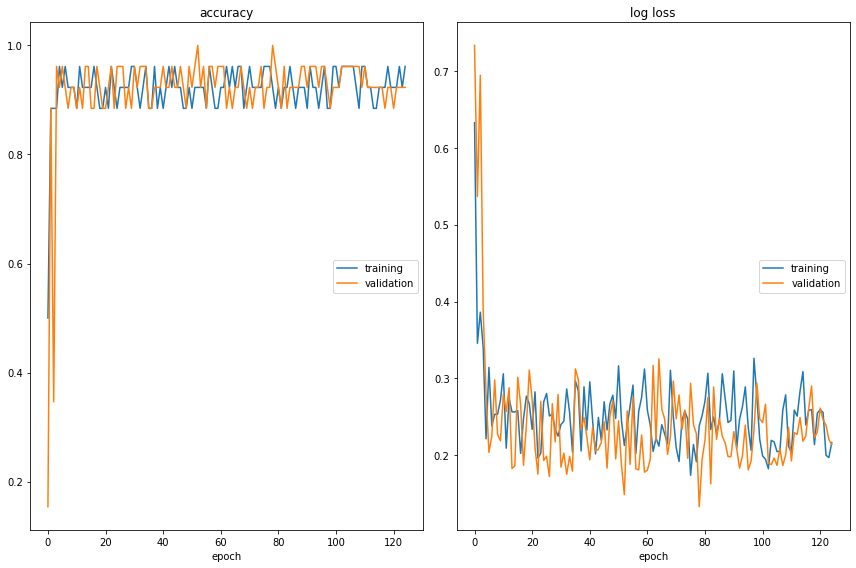

accuracy
	training         	 (min:    0.500, max:    0.962, cur:    0.962)
	validation       	 (min:    0.154, max:    1.000, cur:    0.923)
log loss
	training         	 (min:    0.174, max:    0.633, cur:    0.216)
	validation       	 (min:    0.133, max:    0.733, cur:    0.214)
Training complete in 144m 7s
Best val Acc: 1.000000


In [48]:
import torch.optim as optim
import copy
import time
dataset_sizes = {
  'train' : len(train_dataset),
  'dev' : len(dev_dataset),
  'test' : len(test_dataset)
}

dataloaders  = {
    'train' : dl_train,
    'dev': dl_dev,
    'test': dl_test
}
loss_list = []
iteration_list = []
model = Combine()
# Run 10 training epochs on our model
model_ft = model.fit(dataloaders, 125)

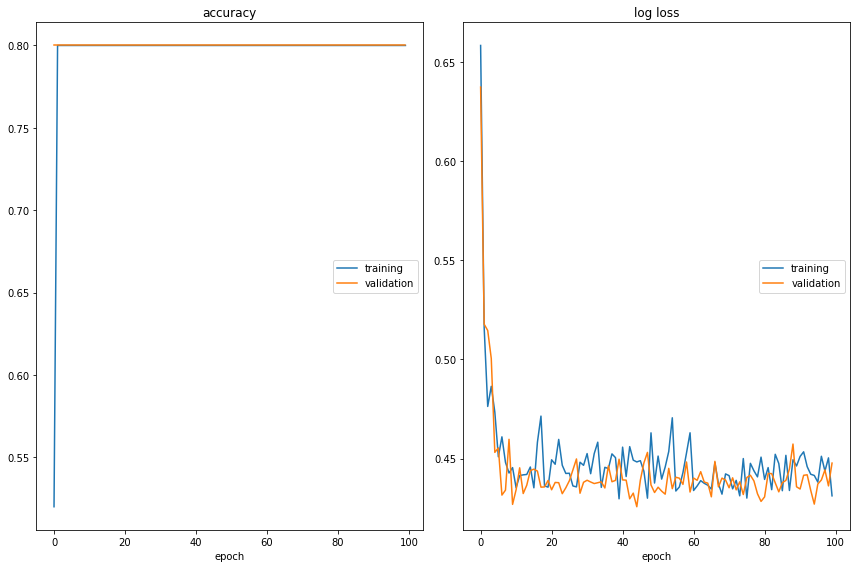

accuracy
	training         	 (min:    0.520, max:    0.800, cur:    0.800)
	validation       	 (min:    0.800, max:    0.800, cur:    0.800)
log loss
	training         	 (min:    0.430, max:    0.658, cur:    0.431)
	validation       	 (min:    0.426, max:    0.637, cur:    0.448)
Training complete in 102m 16s
Best val Acc: 0.800000


In [160]:
import torch.optim as optim
import copy
import time
dataset_sizes = {
  'train' : len(train_dataset),
  'dev' : len(dev_dataset),
  'test' : len(test_dataset)
}

dataloaders  = {
    'train' : dl_train,
    'dev': dl_dev,
    'test': dl_test
}
loss_list = []
iteration_list = []
model = Combine()
# Run 10 training epochs on our model
model_ft = model.fit(dataloaders, 100)

In [49]:
dataset_sizes['test']

24

In [58]:
model_ft.eval()
labels_all = []
preds_all = []
for i, (images, labels) in enumerate(dl_dev):
    output = model_ft(images)
    preds =  torch.round(output)
    labels_all += labels
    preds_all += preds

e6eaadf0.jpg
fbb18dc0.jpg
34d999a9.jpg
40f355ec.jpg
5359825d.jpg
5782ae15.jpg
b39f5cf9.jpg
0a7faa2a.jpg
887db78f.jpg
527321ee.jpg
covid-19-caso-99-1-19.png
333932bd.jpg
x_lens:  [4, 1, 3, 2, 1, 1]
xx_pad.shape:  torch.Size([6, 4, 3, 224, 224])


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


x.size():  torch.Size([6, 4, 3, 224, 224])
c_in.shape:  torch.Size([24, 3, 224, 224])
features.shape:  torch.Size([24, 1024, 7, 7])
out.shape:  torch.Size([24, 1024, 1, 1])
c_out.shape:  torch.Size([24, 1024])
r_in.shape:  torch.Size([6, 4, 1024])
jkms-35-e79-g001-l-b.jpg
jkms-35-e79-g001-l-c.jpg
jkms-35-e79-g001-l-a.jpg
jkms-35-e79-g001-l-d.jpg
jkms-35-e79-g001-l-e.jpg
000003.jpg
000005.jpg
000004.jpg
covid-19-caso-95-4-12.png
covid-19-caso-95-3-14.png
covid-19-caso-95-2-16.png
covid-19-caso-95-1-15.png
bd3ceeb6.jpg
a4318ac9.jpg
2168a917.jpg
35b446ce.jpg
90070cbc.jpg
00870a9c.jpg
296_2020_4584_Fig2_HTML-b.png
296_2020_4584_Fig2_HTML-c.png
296_2020_4584_Fig2_HTML-a.png
x_lens:  [5, 3, 4, 3, 3, 3]
xx_pad.shape:  torch.Size([6, 5, 3, 224, 224])
x.size():  torch.Size([6, 5, 3, 224, 224])
c_in.shape:  torch.Size([30, 3, 224, 224])
features.shape:  torch.Size([30, 1024, 7, 7])
out.shape:  torch.Size([30, 1024, 1, 1])
c_out.shape:  torch.Size([30, 1024])
r_in.shape:  torch.Size([6, 5, 1024])

In [59]:
comparison_df = pd.DataFrame(labels_all).rename(columns={0: 'labels'})
comparison_df['preds'] = [int(preds_all_el) for preds_all_el in preds_all]
comparison_df['misclassified'] = comparison_df.apply(lambda col: col['labels'] != col['preds'], axis=1)
comparison_df.head()

,labels,preds,misclassified
0,1,1,False
1,1,1,False
2,1,1,False
3,0,1,True
4,1,1,False


In [61]:
model_ft.eval() # set model to eval phase

from sklearn.metrics import classification_report
import pandas as pd
nb_classes = 2
y_true = list()
y_pred = list()
outputs_l = list()
with torch.no_grad():
    confusion_matrix = torch.zeros(nb_classes, nb_classes)
    for i, (images, labels) in enumerate(dl_dev):
        outputs = model_ft(images)
        print("outputs: ", outputs)
        print("labels: ", labels)
        preds = (outputs>0.5).float()
        y_true += list(labels)
        outputs_l += list(outputs)
        y_pred += list(preds.data.int())
        for t, p in zip(labels, preds.view(-1)):
          confusion_matrix[t, p.long()] += 1

    print(["Dead","Alive"])
    print(confusion_matrix)
report = classification_report(y_true, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

jkms-35-e79-g001-l-b.jpg
jkms-35-e79-g001-l-c.jpg
jkms-35-e79-g001-l-a.jpg
jkms-35-e79-g001-l-d.jpg
jkms-35-e79-g001-l-e.jpg
35b446ce.jpg
90070cbc.jpg
00870a9c.jpg
5782ae15.jpg
b39f5cf9.jpg
0a7faa2a.jpg
covid-19-caso-95-4-12.png
covid-19-caso-95-3-14.png
covid-19-caso-95-2-16.png
covid-19-caso-95-1-15.png
441c9cdd.jpg
16892_2_1.png
x_lens:  [5, 3, 3, 4, 1, 1]
xx_pad.shape:  torch.Size([6, 5, 3, 224, 224])
x.size():  torch.Size([6, 5, 3, 224, 224])
c_in.shape:  torch.Size([30, 3, 224, 224])


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


features.shape:  torch.Size([30, 1024, 7, 7])
out.shape:  torch.Size([30, 1024, 1, 1])
c_out.shape:  torch.Size([30, 1024])
r_in.shape:  torch.Size([6, 5, 1024])
outputs:  tensor([[0.8328],
        [0.9295],
        [0.9308],
        [0.9132],
        [0.9213],
        [0.9239]])
labels:  (1, 1, 1, 1, 1, 1)
6646071b.jpg
5359825d.jpg
887db78f.jpg
527321ee.jpg
296_2020_4584_Fig2_HTML-b.png
296_2020_4584_Fig2_HTML-c.png
296_2020_4584_Fig2_HTML-a.png
covid-19-caso-99-1-19.png
333932bd.jpg
x_lens:  [1, 1, 2, 3, 1, 1]
xx_pad.shape:  torch.Size([6, 3, 3, 224, 224])
x.size():  torch.Size([6, 3, 3, 224, 224])
c_in.shape:  torch.Size([18, 3, 224, 224])
features.shape:  torch.Size([18, 1024, 7, 7])
out.shape:  torch.Size([18, 1024, 1, 1])
c_out.shape:  torch.Size([18, 1024])
r_in.shape:  torch.Size([6, 3, 1024])
outputs:  tensor([[0.8952],
        [0.9177],
        [0.7778],
        [0.8212],
        [0.9219],
        [0.9204]])
labels:  (1, 1, 0, 1, 1, 1)
16865_1_2.jpg
16865_1_1.jpg
SARS-10.1148

In [52]:
y_pred = [i.numpy()[0] for i in y_pred]

In [62]:
outputs_l

[tensor([0.8328]),
 tensor([0.9295]),
 tensor([0.9308]),
 tensor([0.9132]),
 tensor([0.9213]),
 tensor([0.9239]),
 tensor([0.8952]),
 tensor([0.9177]),
 tensor([0.7778]),
 tensor([0.8212]),
 tensor([0.9219]),
 tensor([0.9204]),
 tensor([0.9059]),
 tensor([0.2470]),
 tensor([0.9150]),
 tensor([0.9202]),
 tensor([0.9124]),
 tensor([0.9057]),
 tensor([0.2971]),
 tensor([0.8189]),
 tensor([0.9135]),
 tensor([0.9201]),
 tensor([0.8008]),
 tensor([0.8572]),
 tensor([0.8998]),
 tensor([0.9248])]

In [54]:
preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

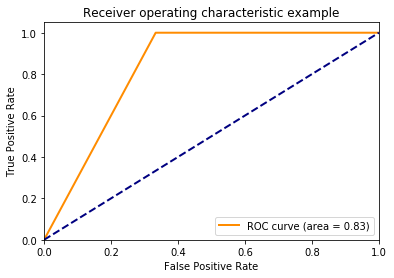

In [63]:
from sklearn import metrics
n_classes = 1

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [56]:
y_true

[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

In [57]:
y_pred

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Confusion matrix, without normalization
[[ 2  1]
 [ 0 23]]
Normalized confusion matrix
[[0.67 0.33]
 [0.   1.  ]]


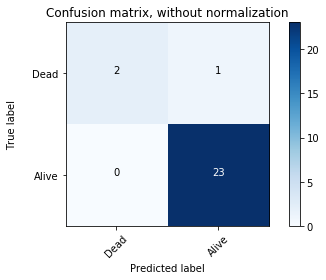

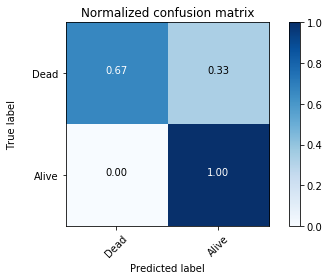

In [68]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=None, figname = None):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(len(classes)),classes, rotation=45)
    plt.yticks(np.arange(len(classes)), classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if cm[i,j]> thresh else "black")
    plt.ylabel("True label", labelpad = 15)
    plt.xlabel("Predicted label")
    plt.ylim(1.5,-0.5)
    plt.tight_layout()
    plt.savefig('confusion_matrix'+ figname + ".png")
    
cnf_matrix = metrics.confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=["Dead","Alive"],
                     title="Confusion matrix, without normalization", figname="without_normalization")

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=["Dead","Alive"], normalize=True,
                     title="Normalized confusion matrix", figname="with_normalization")

plt.show()

In [228]:
!pip install prettytable

In [66]:
from prettytable import PrettyTable
tn, fn, fp, tp = metrics.confusion_matrix(y_pred, y_true).ravel()
print('Threshold: {}'.format(0.5))
x = PrettyTable()
x.field_names = ['', 'Predicted Survival', 'Predicted Death']
x.add_row(['Actual Survivors', tp, fn])
x.add_row(['Actual Deaths', fp, tn])
print(x)

Threshold: 0.5
+------------------+--------------------+-----------------+
|                  | Predicted Survival | Predicted Death |
+------------------+--------------------+-----------------+
| Actual Survivors |         23         |        0        |
|  Actual Deaths   |         1          |        2        |
+------------------+--------------------+-----------------+


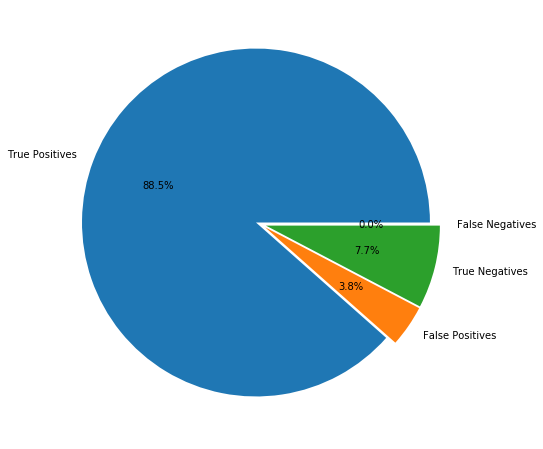

In [67]:
fig1, ax1 = plt.subplots(figsize=(10,8))
sizes = [tp, fp, tn, fn]
explode = [0.03,0.03, 0.03, 0.03]
labelss = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
ax1.pie(sizes, explode=explode, labels=labelss, autopct='%1.1f%%')
plt.show()

In [43]:
model_ft = Combine()
model_ft.load_state_dict(torch.load('best_2.pth'))
model_ft.eval()

Using cache found in /home/ubuntu/.cache/torch/hub/pytorch_vision_v0.6.0


Combine(
  (cnn): CNN(
    (model): DenseNet(
      (features): Sequential(
        (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu0): ReLU(inplace=True)
        (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (denseblock1): _DenseBlock(
          (denselayer1): _DenseLayer(
            (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu1): ReLU(inplace=True)
            (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu2): ReLU(inplace=True)
            (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          )
          (denselayer2): _DenseLayer(
            (n

In [44]:
valencia_covid_df = pd.read_csv('../../datasets/bimcv-covid19/bimcv-covid19.csv', index_col=0)

valencia_covid_df

,Subject,Session,Date,Age,Sex,Filename,Path,Is frontal
0,sub-S03533,ses-E07501,20200328,052Y,M,mod-rx/sub-S03533_ses-E07501_bp-chest_run-1_cr...,../datasets/bimcv-covid19/sub-S03533/ses-E0750...,y
1,sub-S03533,ses-E07501,20200328,052Y,M,mod-rx/sub-S03533_ses-E07501_bp-chest_run-2_cr...,../datasets/bimcv-covid19/sub-S03533/ses-E0750...,y
2,sub-S03909,ses-E08005,20200330,NaN,M,mod-rx/sub-S03909_ses-E08005_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03909/ses-E0800...,y
3,sub-S03711,ses-E07526,20200322,NaN,F,mod-rx/sub-S03711_ses-E07526_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03711/ses-E0752...,y
4,sub-S03711,ses-E07526,20200322,NaN,F,mod-rx/sub-S03711_ses-E07526_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03711/ses-E0752...,n
...,...,...,...,...,...,...,...,...
3032,sub-S03288,ses-E07142,20200310,NaN,F,mod-rx/sub-S03288_ses-E07142_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03288/ses-E0714...,y
3033,sub-S03288,ses-E06470,20200222,NaN,F,mod-rx/sub-S03288_ses-E06470_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03288/ses-E0647...,y
3034,sub-S03288,ses-E06470,20200222,NaN,F,mod-rx/sub-S03288_ses-E06470_bp-chest_run-1_ac...,../datasets/bimcv-covid19/sub-S03288/ses-E0647...,n
3035,sub-S03492,ses-E07022,20200311,NaN,F,mod-rx/sub-S03492_ses-E07022_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03492/ses-E0702...,y


In [45]:
valencia_covid_df['Date'] = pd.to_datetime(valencia_covid_df['Date'], format='%Y%m%d')

In [46]:
valencia_covid_df['Date'].dtype

dtype('<M8[ns]')

In [47]:
valencia_covid_df['Date']

0      2020-03-28
1      2020-03-28
2      2020-03-30
3      2020-03-22
4      2020-03-22
          ...    
3032   2020-03-10
3033   2020-02-22
3034   2020-02-22
3035   2020-03-11
3036   2020-03-11
Name: Date, Length: 3037, dtype: datetime64[ns]

In [48]:
valencia_covid_df2 = valencia_covid_df.dropna(subset=['Date'])
valencia_covid_df2 = valencia_covid_df2.sort_values(by=['Subject','Date'])
valencia_covid_df2 = valencia_covid_df2.reset_index(drop=True)
valencia_covid_df2.head()

,Subject,Session,Date,Age,Sex,Filename,Path,Is frontal
0,sub-S03084,ses-E06756,2020-03-13,046Y,M,mod-rx/sub-S03084_ses-E06756_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03084/ses-E0675...,y
1,sub-S03084,ses-E06883,2020-03-14,046Y,M,mod-rx/sub-S03084_ses-E06883_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03084/ses-E0688...,y
2,sub-S03084,ses-E06963,2020-03-16,046Y,M,mod-rx/sub-S03084_ses-E06963_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03084/ses-E0696...,y
3,sub-S03084,ses-E06606,2020-03-20,046Y,M,mod-rx/sub-S03084_ses-E06606_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03084/ses-E0660...,y
4,sub-S03084,ses-E06271,2020-03-22,046Y,M,mod-rx/sub-S03084_ses-E06271_bp-chest_run-1_vp...,../datasets/bimcv-covid19/sub-S03084/ses-E0627...,y


In [49]:
class ChestXRayDataset2(torch.utils.data.Dataset):
    def __init__(self, image_dirs, df, transform):
        def get_images(filenames,patient):
            #print(os.listdir(image_dirs['covid']))
            images = [os.path.join("../", x) for x in  filenames]
            print(f'Found {len(images)} examples for patient {patient}')
            return images
        self.df = df
        self.images = {}
        self.labels = []
        self.pat_ids = self.df['Subject'].unique().tolist()
        print(self.pat_ids)
        print(len(self.pat_ids))
        for i, patient in enumerate(self.pat_ids):
            print(patient)
            filenames = self.df[self.df['Subject'] == patient]['Path'].tolist()
            print(filenames)
            self.images[i] = get_images(filenames, patient)
            self.labels.append(-1)
            #if self.df[self.df['Subject'] == patient]['survival'].iloc[0] == "N":
              #  self.labels.append(0)
            #else:
               # self.labels.append(1)
            
        self.image_dirs = image_dirs
        self.transform = transform
    
    def __len__(self):
        return len(self.images) # sum([len(self.images[patient]) for patient in self.pat_ids])
    
    
    def __getitem__(self, index):
        xray_series = []
        all_images = self.images[index]
        for image_name in all_images:
            print(image_name)
            image_path = os.path.join("./",image_name)
            data = np.array(Image.open(image_path))
            # save the image
            plt.imsave(image_path.replace('png','jpg'), data)
            image = Image.open(image_path.replace('png','jpg'))
            image = self.transform(image)
            xray_series.append(image)
    
        img_stack = torch.stack(xray_series)
        return img_stack, self.labels[index]

In [50]:
len(valencia_covid_df2)

3037

# Inference on Valencia Dataset

In [51]:
test_dirs2 = {
    'covid': '../../datasets'
}

test_dataset2 = ChestXRayDataset2(test_dirs2, valencia_covid_df2[400:600], transform)

['sub-S03182', 'sub-S03183', 'sub-S03184', 'sub-S03185', 'sub-S03186', 'sub-S03187', 'sub-S03188', 'sub-S03189', 'sub-S03190', 'sub-S03191', 'sub-S03192', 'sub-S03193', 'sub-S03194', 'sub-S03195', 'sub-S03196', 'sub-S03197', 'sub-S03198', 'sub-S03199', 'sub-S03200', 'sub-S03201', 'sub-S03202', 'sub-S03203', 'sub-S03204', 'sub-S03205', 'sub-S03206', 'sub-S03207', 'sub-S03208', 'sub-S03209', 'sub-S03210', 'sub-S03211', 'sub-S03212', 'sub-S03213', 'sub-S03214', 'sub-S03215', 'sub-S03216', 'sub-S03217', 'sub-S03218', 'sub-S03219', 'sub-S03221', 'sub-S03222', 'sub-S03223', 'sub-S03224', 'sub-S03225', 'sub-S03226', 'sub-S03227']
45
sub-S03182
['../datasets/bimcv-covid19/sub-S03182/ses-E06313/mod-rx/sub-S03182_ses-E06313_run-1_bp-chest_vp-ap_cr.png']
Found 1 examples for patient sub-S03182
sub-S03183
['../datasets/bimcv-covid19/sub-S03183/ses-E06394/mod-rx/sub-S03183_ses-E06394_run-1_bp-chest_vp-pa_cr.png', '../datasets/bimcv-covid19/sub-S03183/ses-E06504/mod-rx/sub-S03183_ses-E06504_run-1_bp

In [52]:
dl_test2 = torch.utils.data.DataLoader(test_dataset2, batch_size=batch_size, shuffle=True, collate_fn=pad_collate)

In [53]:
len(dl_test2)

8

In [54]:
model_ft.eval()
labels_all = []
outputs_all = []
preds_all = []
for i, (images, labels) in enumerate(dl_test2):
    #if i == 20:
       # break
    print("i: ", i)
    output = model_ft(images)
    preds =  torch.round(output)
    outputs_all += output
    labels_all += labels
    preds_all += preds

../../datasets/bimcv-covid19/sub-S03183/ses-E06394/mod-rx/sub-S03183_ses-E06394_run-1_bp-chest_vp-pa_cr.png
../../datasets/bimcv-covid19/sub-S03183/ses-E06504/mod-rx/sub-S03183_ses-E06504_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03183/ses-E06589/mod-rx/sub-S03183_ses-E06589_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03183/ses-E06314/mod-rx/sub-S03183_ses-E06314_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03223/ses-E06371/mod-rx/sub-S03223_ses-E06371_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03223/ses-E06918/mod-rx/sub-S03223_ses-E06918_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03197/ses-E06974/mod-rx/sub-S03197_ses-E06974_run-1_bp-chest_cr.png
../../datasets/bimcv-covid19/sub-S03197/ses-E07120/mod-rx/sub-S03197_ses-E07120_run-1_bp-chest_cr.png
../../datasets/bimcv-covid19/sub-S03197/ses-E06619/mod-rx/sub-S03197_ses-E06619_acq-1_run-1_bp-chest_cr.png
../../datasets/bimcv-covid19/sub-S03197/

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


features.shape:  torch.Size([36, 1024, 7, 7])
out.shape:  torch.Size([36, 1024, 1, 1])
c_out.shape:  torch.Size([36, 1024])
r_in.shape:  torch.Size([6, 6, 1024])
../../datasets/bimcv-covid19/sub-S03199/ses-E07082/mod-rx/sub-S03199_ses-E07082_acq-1_run-1_bp-chest_vp-pa_dx.png
../../datasets/bimcv-covid19/sub-S03199/ses-E07082/mod-rx/sub-S03199_ses-E07082_acq-2_run-1_bp-chest_vp-pa_dx.png
../../datasets/bimcv-covid19/sub-S03199/ses-E06341/mod-rx/sub-S03199_ses-E06341_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03199/ses-E07380/mod-rx/sub-S03199_ses-E07380_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03210/ses-E06353/mod-rx/sub-S03210_ses-E06353_run-1_bp-chest_vp-pa_dx.png
../../datasets/bimcv-covid19/sub-S03213/ses-E07796/mod-rx/sub-S03213_ses-E07796_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03213/ses-E07631/mod-rx/sub-S03213_ses-E07631_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03207/ses-E07102/mod-rx/sub-S03207_s

../../datasets/bimcv-covid19/sub-S03209/ses-E06810/mod-rx/sub-S03209_ses-E06810_acq-2_run-1_bp-chest_vp-pa_dx.png
../../datasets/bimcv-covid19/sub-S03209/ses-E06352/mod-rx/sub-S03209_ses-E06352_run-2_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03209/ses-E06352/mod-rx/sub-S03209_ses-E06352_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03209/ses-E07826/mod-rx/sub-S03209_ses-E07826_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03209/ses-E08059/mod-rx/sub-S03209_ses-E08059_run-1_bp-chest_vp-ap_dx.png
x_lens:  [8, 4, 4, 1, 3, 6]
xx_pad.shape:  torch.Size([6, 8, 3, 224, 224])
i:  3
x.size():  torch.Size([6, 8, 3, 224, 224])
c_in.shape:  torch.Size([48, 3, 224, 224])
features.shape:  torch.Size([48, 1024, 7, 7])
out.shape:  torch.Size([48, 1024, 1, 1])
c_out.shape:  torch.Size([48, 1024])
r_in.shape:  torch.Size([6, 8, 1024])
../../datasets/bimcv-covid19/sub-S03215/ses-E06783/mod-rx/sub-S03215_ses-E06783_run-1_bp-chest_vp-pa_dx.png
../../datasets/bi

../../datasets/bimcv-covid19/sub-S03187/ses-E07465/mod-rx/sub-S03187_ses-E07465_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03187/ses-E08035/mod-rx/sub-S03187_ses-E08035_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03187/ses-E07628/mod-rx/sub-S03187_ses-E07628_acq-1_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03187/ses-E07628/mod-rx/sub-S03187_ses-E07628_acq-2_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03221/ses-E06369/mod-rx/sub-S03221_ses-E06369_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03221/ses-E06673/mod-rx/sub-S03221_ses-E06673_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03184/ses-E07161/mod-rx/sub-S03184_ses-E07161_run-1_bp-chest_vp-lateral_cr.png
../../datasets/bimcv-covid19/sub-S03184/ses-E07161/mod-rx/sub-S03184_ses-E07161_run-1_bp-chest_vp-pa_cr.png
../../datasets/bimcv-covid19/sub-S03184/ses-E06317/mod-rx/sub-S03184_ses-E06317_run-1_bp-chest_vp-pa_dx.png
../../datas

In [55]:
outputs_all

[tensor([0.9310], grad_fn=<UnbindBackward>),
 tensor([0.9289], grad_fn=<UnbindBackward>),
 tensor([0.9183], grad_fn=<UnbindBackward>),
 tensor([0.8462], grad_fn=<UnbindBackward>),
 tensor([0.9130], grad_fn=<UnbindBackward>),
 tensor([0.9318], grad_fn=<UnbindBackward>),
 tensor([0.9326], grad_fn=<UnbindBackward>),
 tensor([0.9217], grad_fn=<UnbindBackward>),
 tensor([0.9282], grad_fn=<UnbindBackward>),
 tensor([0.9308], grad_fn=<UnbindBackward>),
 tensor([0.8428], grad_fn=<UnbindBackward>),
 tensor([0.9345], grad_fn=<UnbindBackward>),
 tensor([0.8427], grad_fn=<UnbindBackward>),
 tensor([0.9217], grad_fn=<UnbindBackward>),
 tensor([0.9324], grad_fn=<UnbindBackward>),
 tensor([0.9095], grad_fn=<UnbindBackward>),
 tensor([0.8486], grad_fn=<UnbindBackward>),
 tensor([0.9303], grad_fn=<UnbindBackward>),
 tensor([0.8232], grad_fn=<UnbindBackward>),
 tensor([0.9332], grad_fn=<UnbindBackward>),
 tensor([0.9339], grad_fn=<UnbindBackward>),
 tensor([0.9189], grad_fn=<UnbindBackward>),
 tensor([0

In [167]:
outputs_all[31]

tensor([0.9330], grad_fn=<UnbindBackward>)

In [57]:
test_dataset2.__getitem__(29)[0]

../../datasets/bimcv-covid19/sub-S03211/ses-E06464/mod-rx/sub-S03211_ses-E06464_acq-1_run-1_bp-chest_vp-ll_dx.png
../../datasets/bimcv-covid19/sub-S03211/ses-E06464/mod-rx/sub-S03211_ses-E06464_acq-2_run-1_bp-chest_vp-ll_dx.png
../../datasets/bimcv-covid19/sub-S03211/ses-E06628/mod-rx/sub-S03211_ses-E06628_acq-1_run-1_bp-chest_vp-ll_dx.png
../../datasets/bimcv-covid19/sub-S03211/ses-E06628/mod-rx/sub-S03211_ses-E06628_acq-2_run-1_bp-chest_vp-ll_dx.png
../../datasets/bimcv-covid19/sub-S03211/ses-E06355/mod-rx/sub-S03211_ses-E06355_run-1_bp-chest_vp-ap_dx.png
../../datasets/bimcv-covid19/sub-S03211/ses-E07837/mod-rx/sub-S03211_ses-E07837_run-1_bp-chest_vp-ap_dx.png


tensor([[[[-1.1760, -1.1418, -1.4500,  ..., -0.9020, -0.8678, -0.9020],
          [-1.1760, -1.1760, -1.4500,  ..., -0.9192, -0.8849, -0.9192],
          [-1.2103, -1.2103, -1.4672,  ..., -0.9192, -0.9020, -0.9363],
          ...,
          [-1.2788, -1.2274, -1.1418,  ..., -1.5014, -1.3302, -1.0219],
          [-1.3130, -1.2617, -1.1932,  ..., -1.4672, -1.2959, -0.9877],
          [-1.3644, -1.3302, -1.2617,  ..., -1.4672, -1.2788, -0.9534]],

         [[ 1.1856,  1.1856,  0.8704,  ..., -1.7731, -1.5805, -1.3354],
          [ 1.1856,  1.1856,  0.8354,  ..., -1.7381, -1.5280, -1.2829],
          [ 1.1681,  1.1856,  0.8179,  ..., -1.7206, -1.4930, -1.2654],
          ...,
          [-0.2850, -0.3901, -0.6001,  ...,  0.9055,  1.0805,  1.2731],
          [-0.1800, -0.2850, -0.4601,  ...,  0.9405,  1.1155,  1.2906],
          [-0.0224, -0.1450, -0.3025,  ...,  0.9755,  1.1331,  1.3081]],

         [[ 0.2871,  0.2696,  0.4614,  ..., -0.0964,  0.0605,  0.2871],
          [ 0.2871,  0.2871,  

In [58]:
class DenseNetModel(nn.Module):
  def __init__(self, num_classes = 3, num_channels=6):
    super(DenseNetModel, self).__init__()
    # obtain the desired model from the pretrained models library
    # loading a pretrained model
    self.model =  torch.hub.load('pytorch/vision:v0.6.0', 'densenet121', pretrained=True)

    # Build our classifier 
    self.classifier = nn.Linear(1024, num_classes, bias=True)
    ## Freeze model weights 
    ##ct = 0
    ##for child in self.model.children():
      ##  ct+=1
        ##if ct < 2:
          ##  for params in child.parameters():
            ##    params.requires_grad = False  
    # We replace last layer of base model to our custom trainable classifier
    self.model.classifier = self.classifier

  def forward(self, x):
    features = self.features(x)
    out = F.relu(features, inplace=True)
    out = F.adaptive_avg_pool2d(out, (1,1))
    out = torch.flatten(out,1)
    out = self.model.classifier(out)
    return out
  
  def fit(self, dataloaders, num_epochs):

    # We check whether a gpu is enabled for our environment.
    
    train_on_gpu = torch.cuda.is_available()
    
    # We define our optimizer and pass in the model parameters (weights and biases) 
    # into the constructor of the optimizer we want. 
    # More info: https://pytorch.org/docs/stable/optim.html
    
    optimizer = optim.Adam(self.model.parameters())
    
    # Essentially what scheduler does is to reduce our learning by a certain factor 
    # when less progress is being made in our training.
    
    scheduler = optim.lr_scheduler.StepLR(optimizer, 4)
    
    # Criterion is the loss function of our model. 
    # We use Negative Log-Likelihood loss because we used log-softmax as the last layer of our model. 
    # We can remove the log-softmax layer and replace the nn.NLLLoss() with nn.CrossEntropyLoss()
    
    #criterion = nn.NLLLoss()
    criterion = nn.CrossEntropyLoss()
    since = time.time()
    
    # model.state_dict() is a dictionary of our model's parameters. What we did here 
    # is to deepcopy it and assign it to a variable
    
    best_model_wts = copy.deepcopy(self.model.state_dict())
    best_acc = 0.0
    
    # We check if a gpu is enabled for our environment and move our model to the gpu
    
    if train_on_gpu:
        self.model = self.model.cuda()
    for epoch in range(1,num_epochs+1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 10)
        
        # Each epoch has a training and validation phase. 
        # We iterate through the training set and validation set in every epoch.
        
        for phase in ['train', 'dev']:
        
            # we apply the scheduler to the learning rate in the training phase since 
            # we don't train our model in the validation phase
            
            if phase == 'train':
                scheduler.step()
                self.model.train()  # Set model to training mode
            else:
                self.model.eval()   #Set model to evaluate mode to turn off features like dropout
            running_loss = 0.0
            running_corrects = 0
            
            # Iterate over batches of train and validation data.
            
            for inputs, labels in dataloaders[phase]:
                if train_on_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                    
                # clear all gradients since gradients get accumulated after every iteration.
                optimizer.zero_grad()
    
                # track history if only in training phase
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = self.model(inputs)
                    _, preds = torch.max(outputs, 1)
                    
                # calculates the loss between the output of our model and ground-truth
                labels
                
                loss = criterion(outputs, labels)
                
                # perform backpropagation and optimization only if in training phase
                
                if phase == 'train':
                
                # backpropagate gradients from the loss node through all the parameters
                    loss.backward()
                    
                    # Update parameters(Weighs and biases) of our model using the gradients.
                    
                    optimizer.step()
              # Statistics
              
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
                
            # Deep copy the model if we obtain a better validation accuracy than the previous one.
            
            if phase == 'dev'  and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(self.model.state_dict())
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    
    # Load best model parameters and return it as the final trained model.
    
    self.model.load_state_dict(best_model_wts)
    return self.model

In [59]:
# We instantiate our model class
#densenet121 = DenseNetModel()
#densenet121.fc = torch.nn.Linear(in_features=1024, out_features=3)
#densenet121.load_state_dict(torch.load('../densenet121_ft.pth'))
#densenet121.eval()

resnet18 = torchvision.models.resnet18(pretrained=False)
resnet18.fc = torch.nn.Linear(in_features=512, out_features=3)
resnet18.load_state_dict(torch.load('../reference_balanced.pth'))
resnet18.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [60]:
resnet18.to('cpu')

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [61]:
class_names = ['normal', 'viral', 'covid']

In [62]:
mod = nn.Sequential(*list(resnet18.children())[:-2])

In [63]:
params = list(resnet18.parameters())
weight_softmax = np.squeeze(params[-2].data.numpy())

In [64]:
def return_CAM(feature_conv, weight, class_idx):
    # generate the class -activation maps upsample to 256x256
    size_upsample = (256, 256)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        beforeDot =  feature_conv.reshape((nc, h*w))
        cam = weight[idx].dot(beforeDot)
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam

In [65]:
for idx in [idx[0]]:
    print("idx: ", idx)
    beforeDot =  features_blobs1.reshape((nc, h*w))
    cam = weight_softmax[idx].dot(beforeDot)
    cam = cam.reshape(h, w)
    cam = cam - np.min(cam)
    cam_img = cam / np.max(cam)
    cam_img = np.uint8(255 * cam_img)
    output_cam.append(cv2.resize(cam_img, size_upsample))

NameError: name 'idx' is not defined

In [66]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.ToPILImage(),
   transforms.Resize((224,224)),
   transforms.ToTensor(),
   normalize
])

../../datasets/bimcv-covid19/sub-S03213/ses-E07796/mod-rx/sub-S03213_ses-E07796_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03213/ses-E07631/mod-rx/sub-S03213_ses-E07631_run-1_bp-chest_vp-ap_cr.png


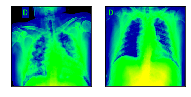

In [170]:
images = test_dataset2.__getitem__(31)[0]
plt.figure(figsize=(8, 8))
for i, image in enumerate(images):
        plt.subplot(4, 6, (i + 1), xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        #mean = np.array([0.485, 0.456, 0.406])
        #std = np.array([0.229, 0.224, 0.225])
        #image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image)
plt.tight_layout()
plt.savefig("sub-S03213.png")
plt.show()


In [121]:
image = test_dataset2.__getitem__(30)[0][0]
image = image.numpy().transpose((1, 2, 0))
image = np.clip(image, 0., 1.)
image.shape

../../datasets/bimcv-covid19/sub-S03212/ses-E07122/mod-rx/sub-S03212_ses-E07122_run-1_bp-chest_vp-pa_dx.png
../../datasets/bimcv-covid19/sub-S03212/ses-E07097/mod-rx/sub-S03212_ses-E07097_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03212/ses-E06357/mod-rx/sub-S03212_ses-E06357_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03212/ses-E07246/mod-rx/sub-S03212_ses-E07246_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03212/ses-E07492/mod-rx/sub-S03212_ses-E07492_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03212/ses-E07947/mod-rx/sub-S03212_ses-E07947_run-1_bp-chest_vp-ap_cr.png


(224, 224, 3)

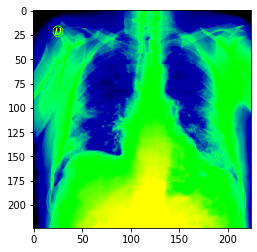

In [122]:
plt.imshow(image)

In [123]:
mod = nn.Sequential(*list(resnet18.children())[:-1])
model=nn.Sequential(mod,resnet18)

In [124]:
to_PIL = transforms.ToPILImage()
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

In [160]:
image = test_dataset2.__getitem__(30)[0][5]
img_tensor = preprocess(image)
img_variable = Variable(img_tensor.unsqueeze(0))
t_img = Variable(normalize(to_tensor(scaler(to_PIL(image)))).unsqueeze(0))
logit = resnet18(t_img)
h_x = F.softmax(logit, dim=1).data.squeeze()

../../datasets/bimcv-covid19/sub-S03212/ses-E07122/mod-rx/sub-S03212_ses-E07122_run-1_bp-chest_vp-pa_dx.png
../../datasets/bimcv-covid19/sub-S03212/ses-E07097/mod-rx/sub-S03212_ses-E07097_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03212/ses-E06357/mod-rx/sub-S03212_ses-E06357_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03212/ses-E07246/mod-rx/sub-S03212_ses-E07246_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03212/ses-E07492/mod-rx/sub-S03212_ses-E07492_run-1_bp-chest_vp-ap_cr.png
../../datasets/bimcv-covid19/sub-S03212/ses-E07947/mod-rx/sub-S03212_ses-E07947_run-1_bp-chest_vp-ap_cr.png


In [161]:
predicted_labels=[]

In [162]:
h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)
probs = probs.detach().numpy()
idx = idx.numpy()

In [163]:
idx[0].item()

2

In [164]:
import cv2
h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)
probs = probs.detach().numpy()
idx = idx.numpy()
predicted_labels.append(idx[0])
predicted =  class_names[idx[0]]
print("Target: " + "covid" + " | Predicted: " +  predicted) 
#features_blobs = mod(img_variable)
features_blobs = mod(img_variable)
features_blobs1 = features_blobs.cpu().detach().numpy()
CAMs = return_CAM(features_blobs1, weight_softmax, [idx[0].item()])

Target: covid | Predicted: covid


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [165]:
size_upsample = (256, 256)
bz, nc, h, w = features_blobs1.shape
output_cam = []
for idx in [idx[0]]:
    print("idx: ", idx)
    beforeDot =  features_blobs1.reshape((nc, h*w))
    cam = weight_softmax[idx].dot(beforeDot)
    cam = cam.reshape(h, w)
    cam = cam - np.min(cam)
    cam_img = cam / np.max(cam)
    cam_img = np.uint8(255 * cam_img)
    output_cam.append(cv2.resize(cam_img, size_upsample))

idx:  2


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [166]:
img = image
_ , height, width = img.shape
img = np.array(img, dtype = np.uint8 )
img = img.transpose((1,2,0))
heatmap = cv2.applyColorMap(cv2.resize(CAMs[0],(width, height)), cv2.COLORMAP_JET)
heatmap = heatmap.transpose((0, 1, 2))
result = heatmap * 0.5 + img * 0.5
cv2.imwrite("3rdimage_6_CAM.png", result)

True

In [183]:
img.shape

(3, 224, 224)

In [147]:
idx

2

In [159]:
weight_softmax.item(idx)

-0.03585389629006386

In [162]:
weight_softmax

array([[ 0.00828554, -0.03178152, -0.0358539 , ...,  0.03717388,
        -0.01000356, -0.013506  ],
       [-0.02965533, -0.00114513,  0.01347167, ..., -0.02093841,
        -0.00668684, -0.03720288],
       [-0.0064253 , -0.04154795, -0.01415597, ...,  0.0021019 ,
         0.02672585, -0.00528629]], dtype=float32)

In [161]:
np.matmul(weight_softmax.item(idx), beforeDot)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [160]:
beforeDot.shape

(512, 49)